# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        response_json = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response_json['coord']['lat']
        city_lng = response_json['coord']['lon']
        city_max_temp = response_json['main']['temp_max']
        city_humidity = response_json['main']['humidity']
        city_clouds = response_json['clouds']['all']
        city_wind = response_json['wind']['speed']
        city_country = response_json['sys']['country']
        city_date = response_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | takaungu
Processing Record 2 of Set 1 | ilulissat
Processing Record 3 of Set 1 | qujing
Processing Record 4 of Set 1 | bridgeton
Processing Record 5 of Set 1 | manfredonia
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | guerrero negro
Processing Record 10 of Set 1 | castillos
Processing Record 11 of Set 1 | tobi village
City not found. Skipping...
Processing Record 12 of Set 1 | taiohae
City not found. Skipping...
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | enewetak
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | tual
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | buala
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | nantucket
Processing Record 22 of Set 1

Processing Record 36 of Set 4 | saudarkrokur
Processing Record 37 of Set 4 | santiago papasquiaro
City not found. Skipping...
Processing Record 38 of Set 4 | zamora
Processing Record 39 of Set 4 | undurkhaan
Processing Record 40 of Set 4 | nishon tumani
Processing Record 41 of Set 4 | barah
Processing Record 42 of Set 4 | wynyard
Processing Record 43 of Set 4 | vila velha
Processing Record 44 of Set 4 | iola
Processing Record 45 of Set 4 | nova vicosa
Processing Record 46 of Set 4 | ceyhan
Processing Record 47 of Set 4 | neftegorsk
Processing Record 48 of Set 4 | barreirinhas
Processing Record 49 of Set 4 | kristiansund
Processing Record 0 of Set 5 | amga
Processing Record 1 of Set 5 | aasiaat
Processing Record 2 of Set 5 | chake chake
Processing Record 3 of Set 5 | olimpia
Processing Record 4 of Set 5 | jaciara
Processing Record 5 of Set 5 | bandar labuan
Processing Record 6 of Set 5 | phultala
Processing Record 7 of Set 5 | sisimiut
Processing Record 8 of Set 5 | san fernando de apur

Processing Record 30 of Set 8 | saint-joseph
Processing Record 31 of Set 8 | zaozersk
Processing Record 32 of Set 8 | shivpuri
Processing Record 33 of Set 8 | castelli
Processing Record 34 of Set 8 | nanping
Processing Record 35 of Set 8 | chonchi
Processing Record 36 of Set 8 | qom
Processing Record 37 of Set 8 | lingyuan
Processing Record 38 of Set 8 | perevolotskiy
Processing Record 39 of Set 8 | cuatro cienegas de carranza
Processing Record 40 of Set 8 | ashburton
Processing Record 41 of Set 8 | utrik
Processing Record 42 of Set 8 | bereznik
Processing Record 43 of Set 8 | malpe
Processing Record 44 of Set 8 | boshan
Processing Record 45 of Set 8 | rada tilly
Processing Record 46 of Set 8 | shimanovsk
Processing Record 47 of Set 8 | palikir - national government center
Processing Record 48 of Set 8 | zhezqazghan
Processing Record 49 of Set 8 | colonia
Processing Record 0 of Set 9 | spratzern
Processing Record 1 of Set 9 | greymouth
Processing Record 2 of Set 9 | lerwick
Processing 

Processing Record 19 of Set 12 | kawambwa
Processing Record 20 of Set 12 | leeton
Processing Record 21 of Set 12 | papao
Processing Record 22 of Set 12 | ishim
Processing Record 23 of Set 12 | kuqa
Processing Record 24 of Set 12 | ille-sur-tet
Processing Record 25 of Set 12 | yorii
Processing Record 26 of Set 12 | arraial do cabo
Processing Record 27 of Set 12 | corner brook
Processing Record 28 of Set 12 | caister-on-sea
Processing Record 29 of Set 12 | straldzha
Processing Record 30 of Set 12 | pangody
Processing Record 31 of Set 12 | holualoa
Processing Record 32 of Set 12 | imatra
Processing Record 33 of Set 12 | zhangye
Processing Record 34 of Set 12 | muzayri'
City not found. Skipping...
Processing Record 35 of Set 12 | pontecorvo
Processing Record 36 of Set 12 | at-bashi
Processing Record 37 of Set 12 | cadillac
Processing Record 38 of Set 12 | kanniyakumari
Processing Record 39 of Set 12 | saint-philippe
Processing Record 40 of Set 12 | sant'antioco
Processing Record 41 of Set 

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,takaungu,-3.6837,39.8566,297.27,82,90,5.49,KE,1686525940
1,ilulissat,69.2167,-51.1000,277.16,81,75,0.00,GL,1686525940
2,qujing,25.4833,103.7833,289.40,74,100,2.38,CN,1686525940
3,bridgeton,39.4273,-75.2341,302.64,55,0,2.57,US,1686525940
4,manfredonia,41.6259,15.9094,292.41,88,20,3.09,IT,1686525941


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../Starter_Code/output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../Starter_Code/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,takaungu,-3.6837,39.8566,297.27,82,90,5.49,KE,1686525940
1,ilulissat,69.2167,-51.1000,277.16,81,75,0.00,GL,1686525940
2,qujing,25.4833,103.7833,289.40,74,100,2.38,CN,1686525940
3,bridgeton,39.4273,-75.2341,302.64,55,0,2.57,US,1686525940
4,manfredonia,41.6259,15.9094,292.41,88,20,3.09,IT,1686525941


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

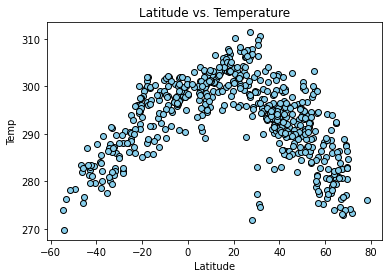

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", facecolors="skyblue")

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temp")

# Save the figure
plt.savefig("../Starter_Code/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

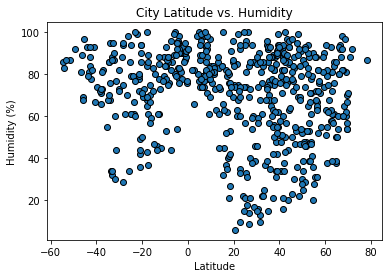

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Starter_Code/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

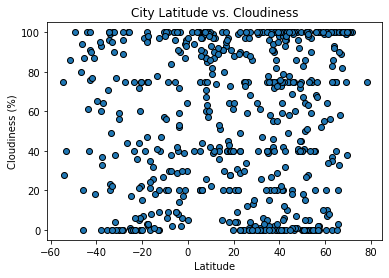

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Starter_Code/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

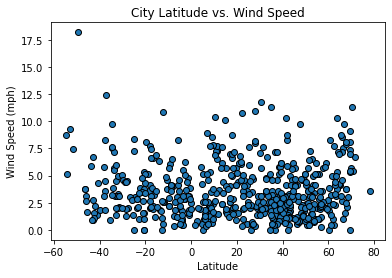

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Starter_Code/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, title, y_label, hemisphere):
    
    # Calculate the correlation coefficient and linear regression model 
    correlation = st.pearsonr(x_values, y_values)
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

    # Create the scatter plot with linear regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.annotate(f"r = {round(correlation[0],2)}", (text_coordinates[0],text_coordinates[1]-50), fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(f"{hemisphere}: {title}\nCorrelation coefficient: {round(correlation[0],2)}")
    plt.grid()

    # Print the r-value
    print(f"The r-value is: {round(rvalue,2)}")

    # Show the plot
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ilulissat,69.2167,-51.1000,277.16,81,75,0.00,GL,1686525940
2,qujing,25.4833,103.7833,289.40,74,100,2.38,CN,1686525940
3,bridgeton,39.4273,-75.2341,302.64,55,0,2.57,US,1686525940
4,manfredonia,41.6259,15.9094,292.41,88,20,3.09,IT,1686525941
8,guerrero negro,27.9769,-114.0611,293.69,54,0,8.02,MX,1686525941


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,takaungu,-3.6837,39.8566,297.27,82,90,5.49,KE,1686525940
5,ushuaia,-54.8000,-68.3000,273.96,86,75,8.75,AR,1686525923
6,adamstown,-25.0660,-130.1015,294.00,61,17,7.28,PN,1686525941
7,bredasdorp,-34.5322,20.0403,286.91,86,100,7.58,ZA,1686525941
9,castillos,-34.1667,-53.8333,280.04,76,23,3.82,UY,1686525941


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.72


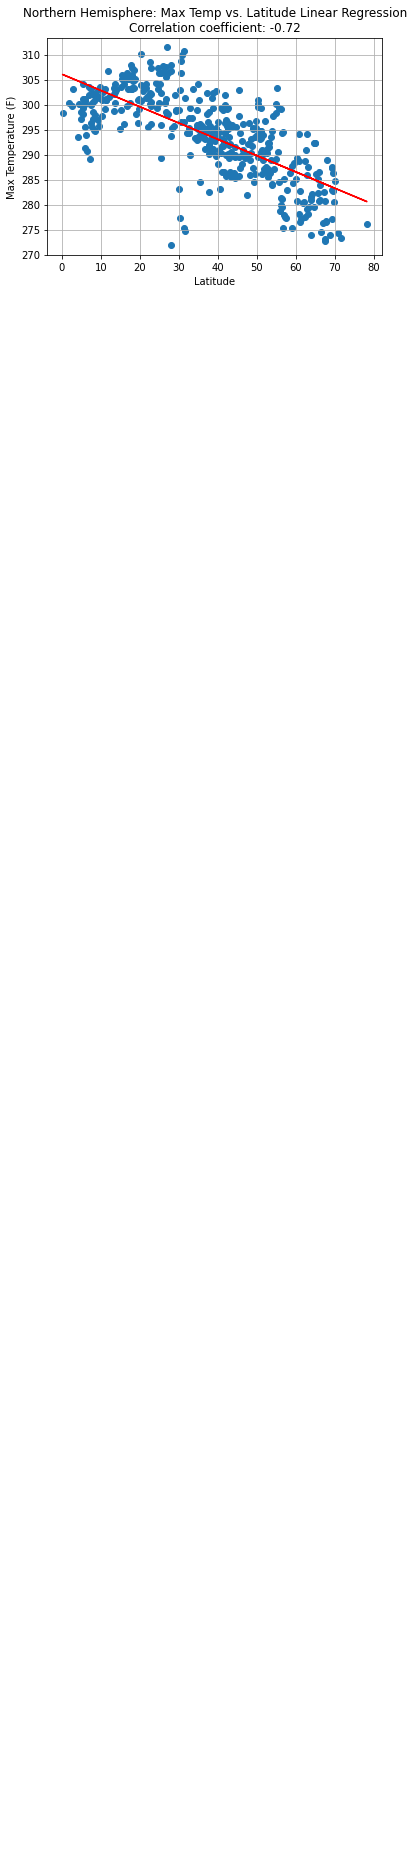

In [18]:
# Linear regression on Northern Hemisphere
from scipy import stats as st
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
text_coordinates = (10, 0)
linear_regression(x_values, y_values, 'Max Temp vs. Latitude Linear Regression', 'Max Temperature (F)', 'Northern Hemisphere')

The r-value is: 0.84


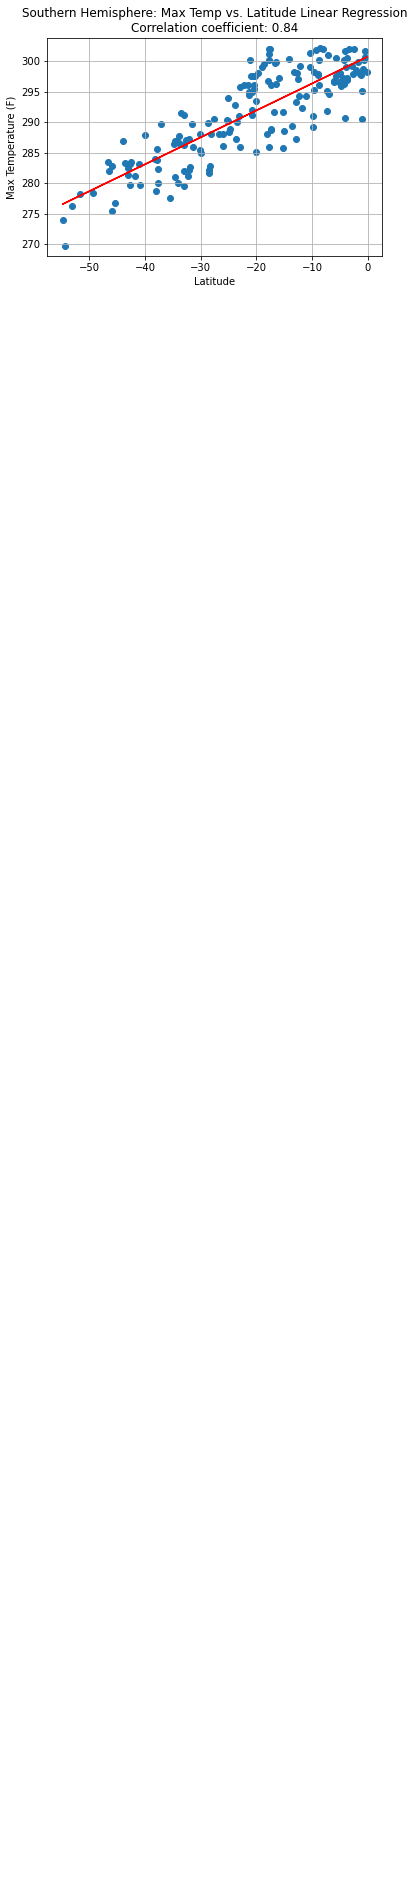

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
text_coordinates = (-50, 50)
linear_regression(x_values, y_values, 'Max Temp vs. Latitude Linear Regression', 'Max Temperature (F)', 'Southern Hemisphere')

**Discussion about the linear relationship:** The higher you are, the higher the temperature will be. Meaning the Nothern Hemisphere has higher temperatures than the Southern Hemisphere. Even though this is occuring, there is a slight linear relationship with both.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.09


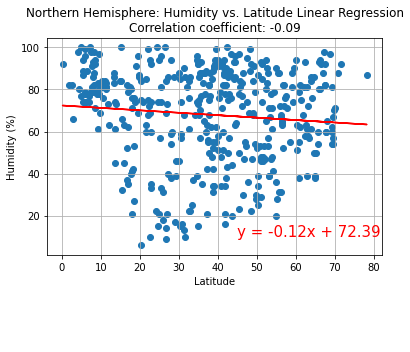

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
text_coordinates = (45, 10)
linear_regression(x_values, y_values, 'Humidity vs. Latitude Linear Regression', 'Humidity (%)', 'Northern Hemisphere')

The r-value is: 0.12


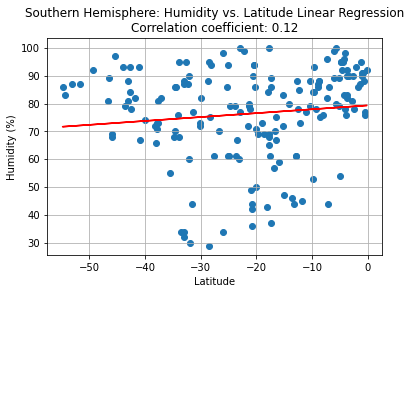

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
text_coordinates = (-50,20)
linear_regression(x_values, y_values, 'Humidity vs. Latitude Linear Regression', 'Humidity (%)', 'Southern Hemisphere')

**Discussion about the linear relationship:** Once again, there is no linear relationship because the results are all over the place causing it to be non-linear.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.01


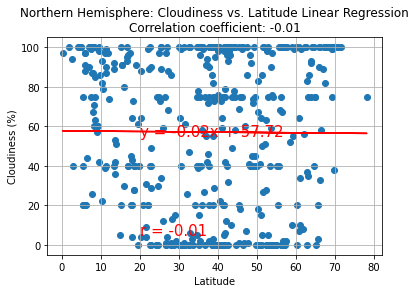

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
text_coordinates = (20, 55)
linear_regression(x_values, y_values, 'Cloudiness vs. Latitude Linear Regression', 'Cloudiness (%)', 'Northern Hemisphere')

The r-value is: -0.09


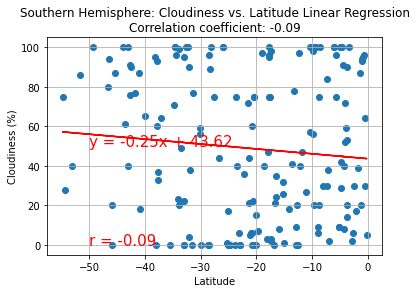

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
text_coordinates = (-50,50)

linear_regression(x_values, y_values, 'Cloudiness vs. Latitude Linear Regression', 'Cloudiness (%)', 'Southern Hemisphere')

**Discussion about the linear relationship:** Just like Temperature was a factor, cloudiness is also factor in both Hemispheres. The Nothern Hemisphere has more cloudiness than the Southern Hemisphere. Both don't have a linear relationship at all.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.06


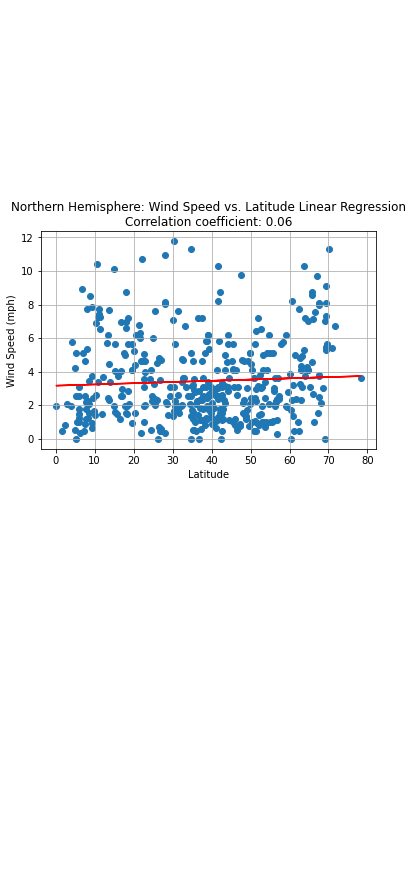

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
text_coordinates = (40, 25)
linear_regression(x_values, y_values, 'Wind Speed vs. Latitude Linear Regression', 'Wind Speed (mph)', 'Northern Hemisphere')


The r-value is: -0.3


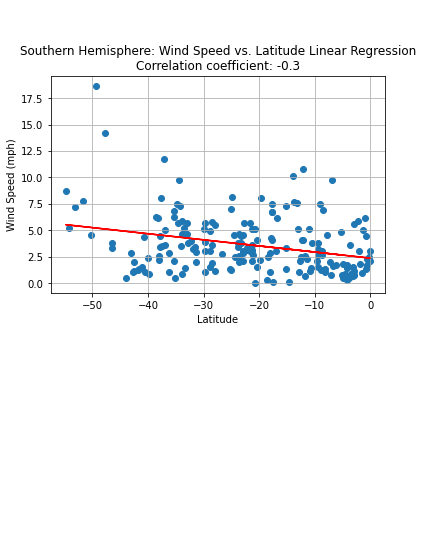

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
text_coordinates = (-50, 25)
linear_regression(x_values, y_values, 'Wind Speed vs. Latitude Linear Regression', 'Wind Speed (mph)', 'Southern Hemisphere')

**Discussion about the linear relationship:** Wind isn't much of factor in either one even the Nothern Hemisphere has more wind than the Southern Hemisphere. However, both winds have the speed even though one is produced more than the other. They have no linear relationship because they are all over the place.